In [1]:
import torch
from PIL import Image
from app import AdversarialNoiseGenerator

## manually set the target

In [2]:
# Instantiate the adversarial noise generator
generator = AdversarialNoiseGenerator(device='cuda' if torch.cuda.is_available() else 'cpu')

/Users/johnwei77/opt/anaconda3/envs/adversarial_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/johnwei77/opt/anaconda3/envs/adversarial_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# Specify a class index
target_class_index = 1  # The maximum number of target classes is 1000

# Get the class name for the index
target_class_name = generator.get_class_name(target_class_index)
print(f"Target class index: {target_class_index}, name: {target_class_name}")

Target class index: 1, name: goldfish


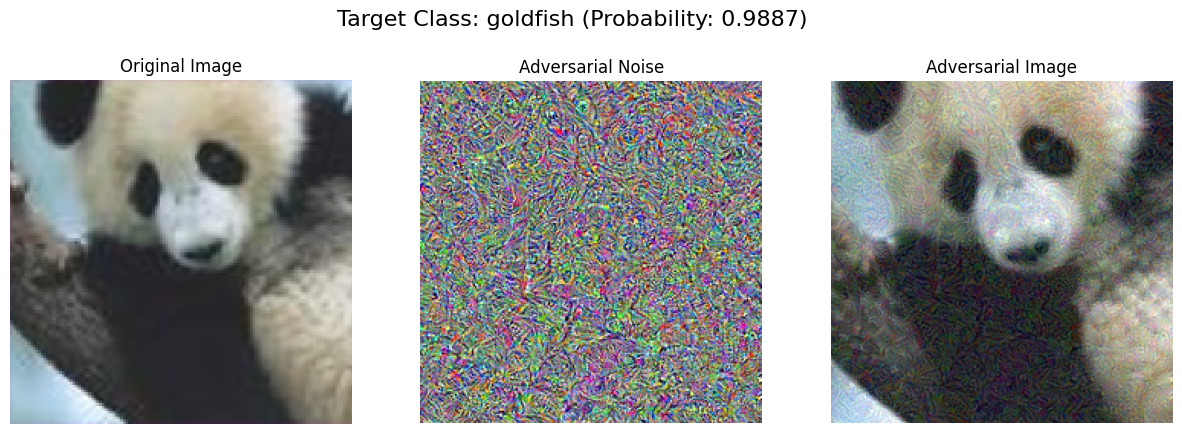

In [13]:
# Provide the image path and target class
image_path = './data/pandas.jpg' 
target_class = target_class_name # Target class name or index
# Visualize the attack with selected target class
generator.visualize_attack(image_path, 
                           target_class=target_class, 
                           epsilon=0.1, 
                           num_iterations=6)

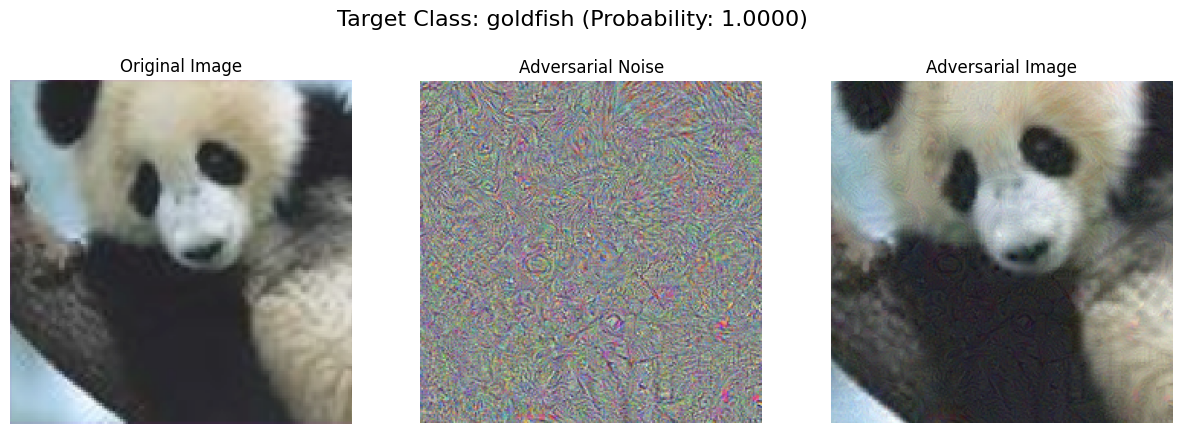

In [ ]:
# Visualize the attack with selected target class, smaller epsilon and more iterations
generator.visualize_attack(image_path, 
                           target_class=target_class, 
                           epsilon=0.01, 
                           num_iterations=100)

In [9]:
# Classify the original image
original_image = Image.open(image_path).convert('RGB')
orig_pred_idx, orig_pred_class = generator.classify(original_image)
print(f"The original image is classified as: {orig_pred_class} (class index: {orig_pred_idx})")

# Generate adversarial image and classify it
adv_image, _, target_class_name, prob = generator.generate(image_path, 
                                                     target_class=target_class, 
                                                     epsilon=0.01, 
                                                     num_iterations=100)
adv_pred_idx, adv_pred_class = generator.classify(adv_image)
print(f"The adversarial image is classified as: {adv_pred_class} (class index: {adv_pred_idx})")
print(f"The target class was: {target_class_name}")

The original image is classified as: giant_panda (class index: 388)
The adversarial image is classified as: goldfish (class index: 1)
The target class was: goldfish


## randomly select the class

Randomly selected target class: ashcan (class index: 412)


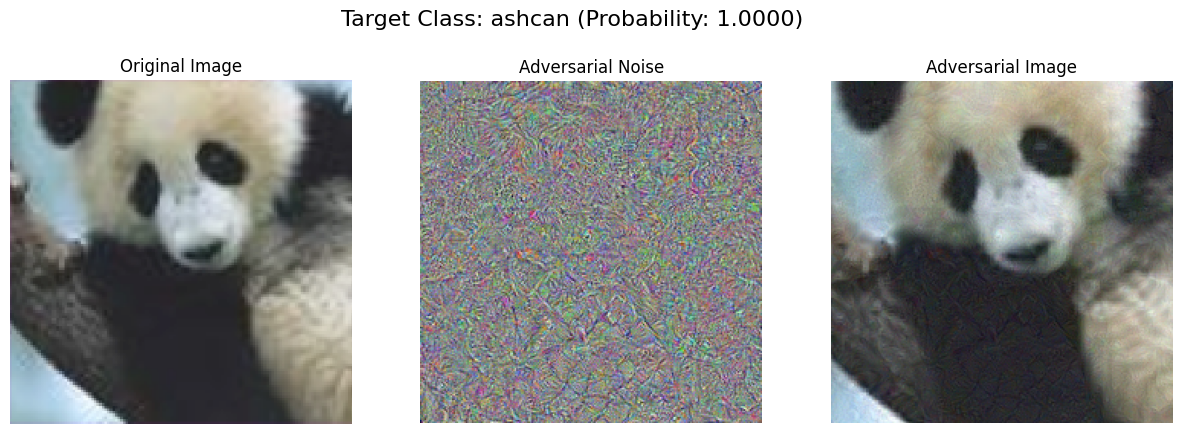

In [14]:
# Visualize the attack with a randomly selected target class
generator.visualize_attack(image_path, 
                           target_class=None, 
                           epsilon=0.01, 
                           num_iterations=100)

In [15]:
# Classify the original image
original_image = Image.open(image_path).convert('RGB')
orig_pred_idx, orig_pred_class = generator.classify(original_image)
print(f"The original image is classified as: {orig_pred_class} (class index: {orig_pred_idx})")

# Generate adversarial image and classify it
adv_image, _, target_class_name, prob = generator.generate(image_path, 
                                                     target_class=None, 
                                                     epsilon=0.01, 
                                                     num_iterations=100)
adv_pred_idx, adv_pred_class = generator.classify(adv_image)
print(f"The adversarial image is classified as: {adv_pred_class} (class index: {adv_pred_idx})")
print(f"The target class was: {target_class_name}")

The original image is classified as: giant_panda (class index: 388)
Randomly selected target class: sturgeon (class index: 394)
The adversarial image is classified as: sturgeon (class index: 394)
The target class was: sturgeon


In [16]:
# Display the probability
print(f"The probability of the adversarial image being classified as '{target_class_name}' is: {prob:.4f}")

The probability of the adversarial image being classified as 'sturgeon' is: 1.0000
